# Data Clustering Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Run these commands if running notebooks on Jupyter, or locally.

df = pd.read_csv('../data/wind_old.csv')
X = df.loc[:, df.columns[1:3]]

In [3]:
# Run these commands when running the notebooks on Google Colab.

df = pd.read_csv('https://raw.githubusercontent.com/AidanNeeson/renewable-ml/main/data/wind_old.csv')
X = df.loc[:, df.columns[1:3]]

In [3]:
Y_axis = X[['lat']]
X_axis = X[['long']]
K_clusters = range(1,100)
kmeans = [KMeans(n_clusters=i, n_init='auto') for i in K_clusters]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

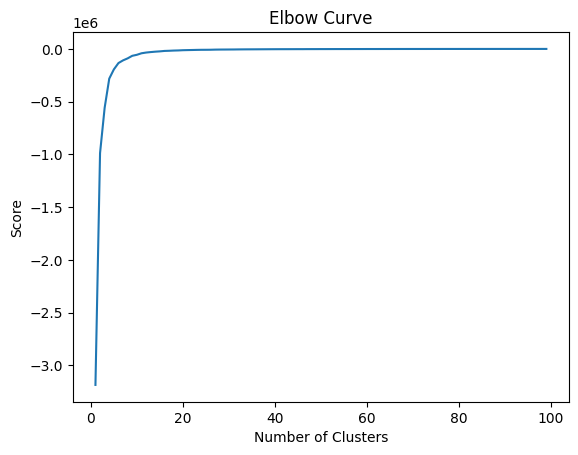

In [4]:
#| label: fig-optimal-clusters
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [5]:
n_clusters = 20
kmeans = KMeans(n_clusters, init='k-means++', n_init='auto')
kmeans.fit(X[X.columns[0:2]])

KMeans(n_clusters=20)

In [6]:
#| label: clustered-data-preview
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
X.head(5)

,lat,long,cluster_label
0,23.510410,-117.147260,7
1,24.007446,-93.946777,6
2,25.069138,-97.482483,6
3,25.069443,-97.463135,6
4,25.069763,-97.443756,6


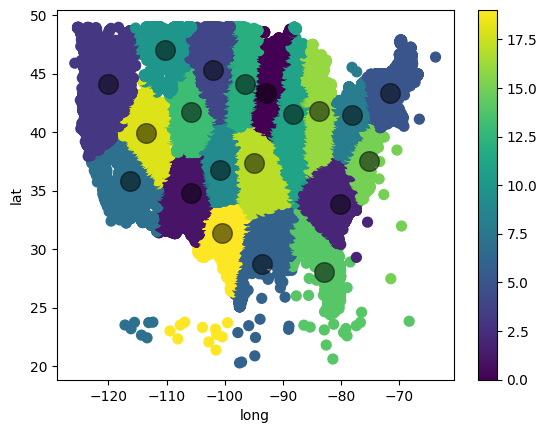

In [7]:
#| label: fig-clustered-data
centers = kmeans.cluster_centers_
labels = kmeans.predict(X[X.columns[0:2]])
X.plot.scatter(x = 'long', y = 'lat', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)
plt.show()